# DATA601-01: Introduction to Data Science
## Final Project Proposal

### Problem Statement:
During the COVID-19 pandemic, online streaming services experienced an increase in viewership. I have watched more tv and movies in the past year than in the 10 before that combined. Since this change is on a global scale, I wanted to look at what movies/tv shows were the most watched during 2020. Then I started to wonder if the differences between the top content could be explained by cultural pyschology, a topic I studied in undergrad. I decided to use data from the 300 item IPIP-NEO-300 questionnaire because it is the most accurate public domain personality test available in order to group personality by country (or continent, depending on how the anlaysis proceeds), and compare to genre psychology research such as:
	- https://www.lifehack.org/417256/what-your-movie-preferences-say-about-you-according-to-researchers
	- https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2756039/
	- https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0179646#sec006
in order to see if individual personality traits correspond to the cultural ones. This comparison will drive the analysis between personality and popular genres. 

### Data Source Location:
	- Netflix Data:
		- https://www.kaggle.com/intandea/netflix2020 
	- Personality Data:
		- https://github.com/automoto/big-five-data 

### Data Discovery:
The netflix data was aquired by using https://datasetsearch.research.google.com with the search term "netflix 2020". The personality data was found with a google search "personality traits by country datasets" This data is free and legal to download. I know you suggested not using Kaggle for the dataset but it was the only one that provided the type of data I could correlate to the personality dataset.

### Description of Available Data:
- The netflix data is 6056 rows x 12 columns. It is a zipfile of 80 csvs grouped by country. Each csv has the same columns. The columns include week, show_type, title, ori_country, genre, release_date, is_NF_Ori, imdb_rating, rt_rating, country_chart, show_link, and Continent. The zipfile is 156KB.


- The personality data is 307313 rows x 9 columns. It is 26.1MB. The columns include case_id, country, age, sex, agreeable_score, extraversion_score, openness_score, conscientiousness_score, neuroticism_score. The gender category shows 1 for male, 2 for female. The scores in each personality trate column are out of 1. 


### Documentation: 
I could not discover documented EDA for the combined data. 

### Hypotheses/Questions:
- There is a correlation between personality and movie/tv show choices
- personality can be grouped on a country wide scale, thus making country movie/tv show choices predictable. 
- movie choices will reflect cultural personalities
- countries with higher scores in extraversion and agreeability will watch movies with lower ratings 



### Genre Psychology
- https://www.lifehack.org/417256/what-your-movie-preferences-say-about-you-according-to-researchers
- https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2756039/
- https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0179646#sec006
- https://time.com/4172673/true-crime-allure/

<img src="https://neuwritesd.files.wordpress.com/2016/10/cnx_psych_11_07_bigfive.jpg?w=648&h=682"
     style="float: left; margin-right: 10px;"
     width="400" />

- **Openness to experience** – high openness scores indicate people who are adventurous, imaginative, and creative where low scores indicate more conventional and practical people.
- **Conscientiousness** – Those who score high in this category are self-disciplined, organized, and high-achieving while those who score low are more spontaneous and less self-controlled.
- **Extraversion** – extroverts tend to be enthusiastic, energetic, and highly social and introverts are more quiet and low-key.
- **Agreeableness** – agreeable people value social harmony and are kind, generous, and trusting. Those who are not are generally more self-interested and skeptical of others.
- **Neuroticism** – those with high neuroticism scores are easily susceptible to stress and emotionally reactive. Low scores indicate those who are calm and emotionally stable.

In [1]:
# install package to convert country codes to full names
# !pip install pycountry

In [2]:
import pandas as pd
import zipfile
import glob
import os
import seaborn as sns
from matplotlib import pyplot as plt
import pycountry

In [3]:
sns.set(font_scale=1.9)

In [4]:
# netlfix data came from a zipfile and needed to be extracted
with zipfile.ZipFile("archive.zip","r") as zip_ref:
    zip_ref.extractall("Netflix Data")

In [5]:
# 80 country files plus one master file, read to dataframe
df = pd.read_csv('Netflix Data/NF_all.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3028 entries, 0 to 3027
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   week           3028 non-null   int64 
 1   show_type      3028 non-null   object
 2   title          3028 non-null   object
 3   ori_country    3028 non-null   object
 4   genre          3028 non-null   object
 5   release_date   3028 non-null   object
 6   is_NF_Ori      3028 non-null   bool  
 7   imdb_rating    3028 non-null   int64 
 8   rt_rating      3028 non-null   int64 
 9   country_chart  3028 non-null   object
 10  show_link      3028 non-null   object
 11  Continent      3028 non-null   object
 12  rel_yr         3028 non-null   int64 
 13  rel_mt         3028 non-null   int64 
dtypes: bool(1), int64(5), object(8)
memory usage: 310.6+ KB


In [7]:
# column not useful
netflix_df = df.drop('show_link', axis=1)

In [8]:
# sort by country and genre
netflix_df.sort_values(['country_chart', 'genre'], ascending=[True, True], inplace=True)

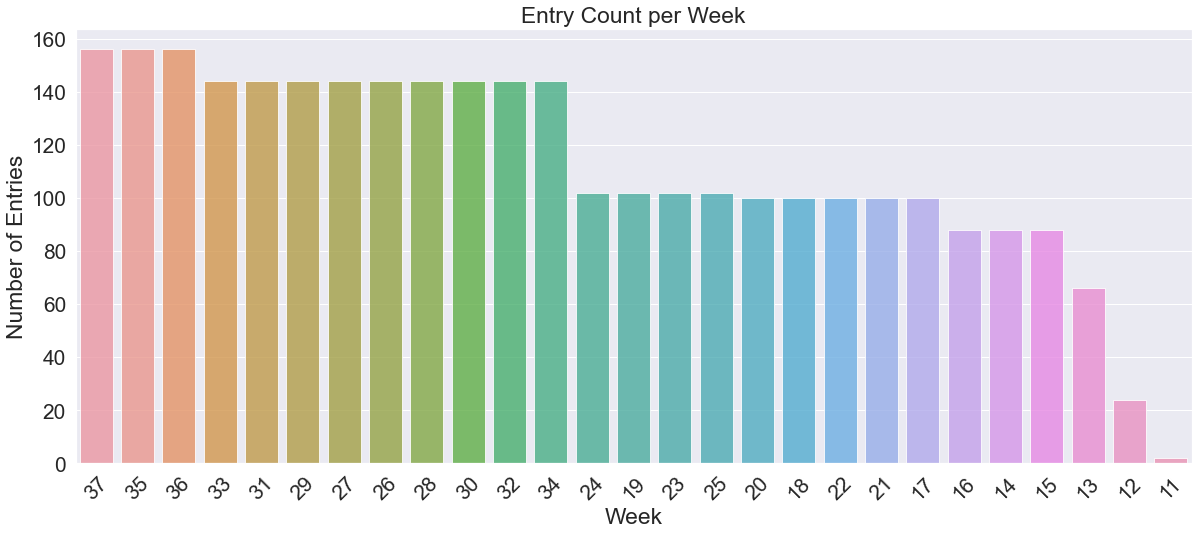

In [9]:
# Plots count of entries per week of year
plt.figure(figsize=(20,8))
sns.countplot(data=netflix_df,x='week', alpha=0.8, order=netflix_df.week.value_counts().index)
plt.title('Entry Count per Week')
plt.ylabel('Number of Entries')
plt.xlabel('Week')
plt.xticks(rotation=45)
plt.show()
plt.clf()
plt.cla()
plt.close()

- Data isn't complete. Missing entries from weeks 1-10, and 38-52
- though weekly data isn't as much of a concern, not having entries from every country for all 52 weeks means the picture is incomplete

In [10]:
# use package to convert 3 digit country codes to full names 
# https://stackoverflow.com/questions/53923433/how-to-get-country-name-from-country-abbreviation-in-python-with-mix-of-alpha-2
list_alpha_2 = [i.alpha_2 for i in list(pycountry.countries)] 
list_alpha_3 = [i.alpha_3 for i in list(pycountry.countries)]    

def country_flag(netflix_df):
    if (len(netflix_df['country_chart'])==3 and netflix_df['country_chart'] in list_alpha_3):
        return pycountry.countries.get(alpha_3=netflix_df['country_chart']).name
    else:
        return netflix_df['country_chart']

netflix_df['country_name']=netflix_df.apply(country_flag, axis = 1)
netflix_df.head()

,week,show_type,title,ori_country,genre,release_date,is_NF_Ori,imdb_rating,rt_rating,country_chart,Continent,rel_yr,rel_mt,country_name
204,36,Movie,Skyscraper,USA,Action,2018-07-04,False,61,48,ARE,ASI,2018,7,United Arab Emirates
206,35,Movie,Project Power,USA,Action,2020-08-14,True,61,63,ARE,ASI,2020,8,United Arab Emirates
202,37,Movie,#Alive,South Korea,Horror,2020-09-08,False,62,86,ARE,ASI,2020,9,United Arab Emirates
203,37,TV Show,Away,USA,Science Fiction,2020-09-04,True,71,73,ARE,ASI,2020,9,United Arab Emirates
205,36,TV Show,Lucifer,USA,Superhero,2016-01-25,True,83,87,ARE,ASI,2016,1,United Arab Emirates


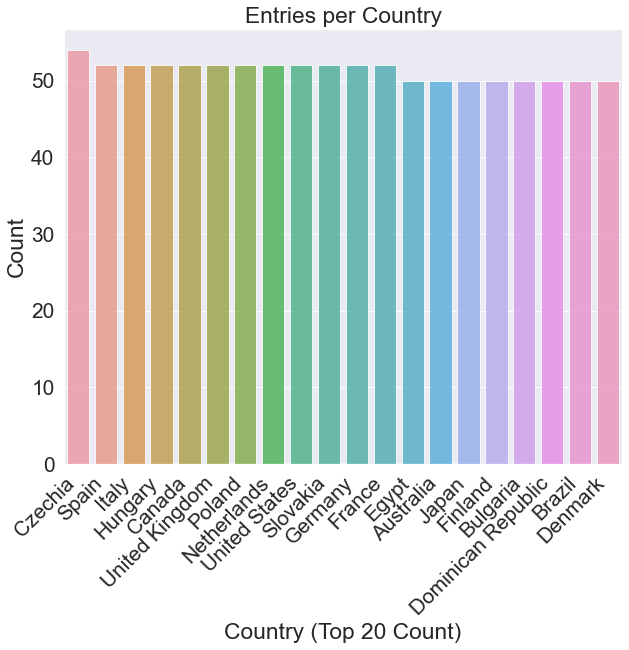

In [11]:
# Plots number of entries per country and orders them
plt.figure(figsize=(10,8))
sns.countplot(data=netflix_df,x='country_name', alpha=0.8, order=netflix_df.country_name.value_counts().iloc[:20].index)
plt.title('Entries per Country')
plt.ylabel('Count')
plt.xlabel('Country (Top 20 Count)')
plt.xticks(rotation=45, ha='right')
plt.show()
plt.clf()
plt.cla()
plt.close()

## Movies

In [12]:
netflix_movies_df = netflix_df[netflix_df['show_type'] == 'Movie']

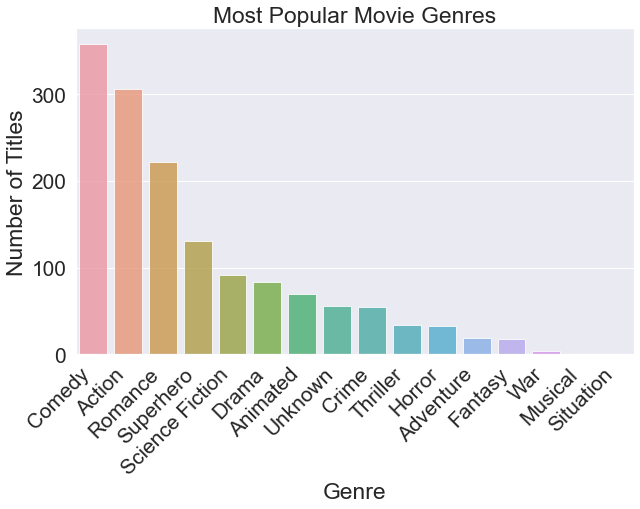

In [13]:
# Plots genre counts for movies
plt.figure(figsize=(10,6))
sns.countplot(data=netflix_movies_df,x='genre', alpha=0.8, order=netflix_movies_df.genre.value_counts().index)
plt.title('Most Popular Movie Genres')
plt.ylabel('Number of Titles')
plt.xlabel('Genre')
plt.xticks(rotation=45, ha='right')
plt.show()
plt.clf()
plt.cla()
plt.close()

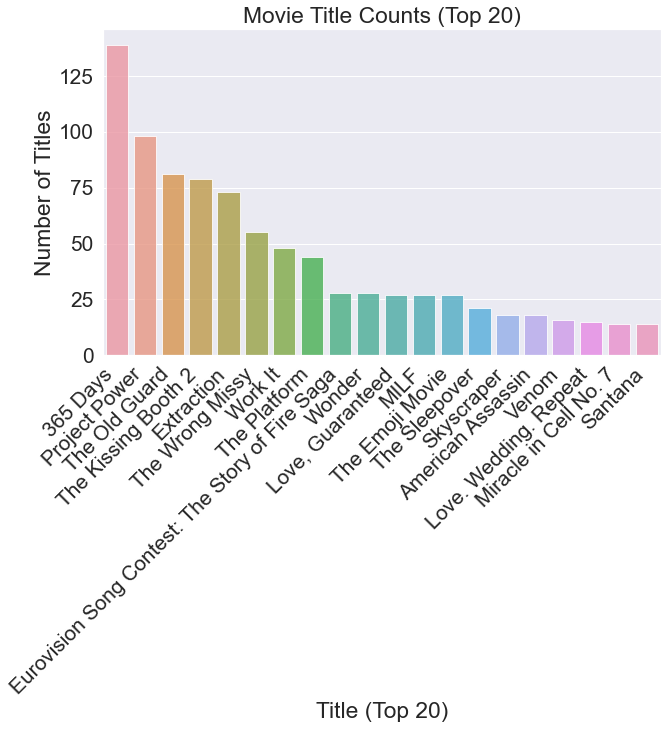

In [14]:
# Plots title counts for movies
plt.figure(figsize=(10,6))
sns.countplot(data=netflix_movies_df,x='title', alpha=0.8, order=netflix_movies_df.title.value_counts().iloc[:20].index)
plt.title('Movie Title Counts (Top 20)')
plt.ylabel('Number of Titles')
plt.xlabel('Title (Top 20)')
plt.xticks(rotation=45, ha='right')
plt.show()
plt.clf()
plt.cla()
plt.close()

## TV Shows

In [15]:
netflix_shows_df = netflix_df[netflix_df['show_type'] == 'TV Show']

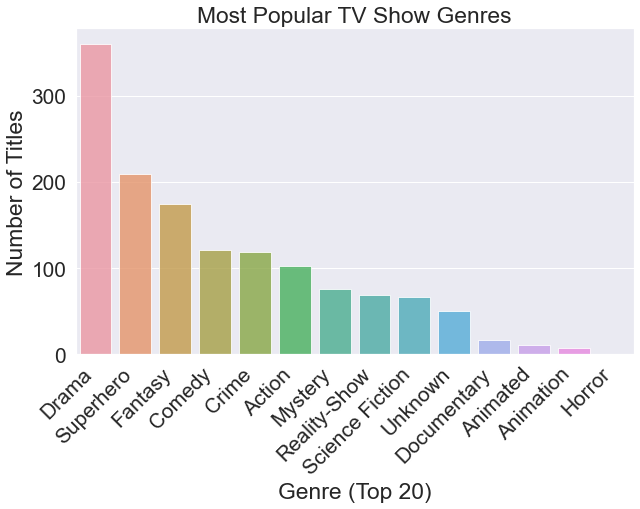

In [16]:
# Plots genre counts for tv shows
plt.figure(figsize=(10,6))
sns.countplot(data=netflix_shows_df,x='genre', alpha=0.8, order=netflix_shows_df.genre.value_counts().index)
plt.title('Most Popular TV Show Genres')
plt.ylabel('Number of Titles')
plt.xlabel('Genre (Top 20)')
plt.xticks(rotation=45, ha='right')
plt.show()
plt.clf()
plt.cla()
plt.close()

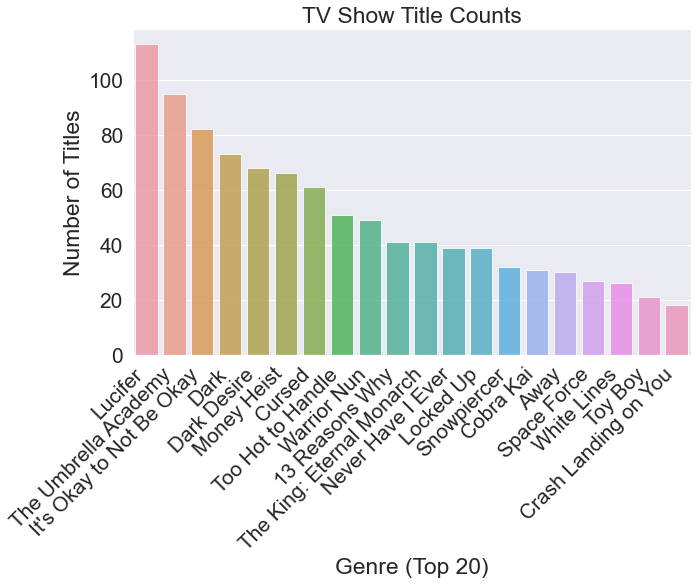

In [17]:
# Plots title counts for TV shows
plt.figure(figsize=(10,6))
sns.countplot(data=netflix_shows_df,x='title', alpha=0.8, order=netflix_shows_df.title.value_counts().iloc[:20].index)
plt.title('TV Show Title Counts')
plt.ylabel('Number of Titles')
plt.xlabel('Genre (Top 20)')
plt.xticks(rotation=45, ha='right')
plt.show()
plt.clf()
plt.cla()
plt.close()

### Conclusions:
- the most popular overall movie genre is comedy
- the most popular overall tv show genre is drama
- 365 Days had the most #1 occurances for movies
- Lucifer had the most #1 occurances for tv shows

## Personality Data

In [18]:
# read csv to dataframe
personality_df = pd.read_csv("big_five_scores.csv")
personality_df.head()

,case_id,country,age,sex,agreeable_score,extraversion_score,openness_score,conscientiousness_score,neuroticism_score
0,1,South Afri,24,1,0.753333,0.496667,0.803333,0.886667,0.426667
1,3,UK,24,2,0.733333,0.680000,0.786667,0.746667,0.590000
2,4,USA,36,2,0.880000,0.770000,0.860000,0.896667,0.296667
3,5,UK,19,1,0.690000,0.616667,0.716667,0.636667,0.563333
4,6,UK,17,1,0.600000,0.713333,0.646667,0.633333,0.513333


In [19]:
personality_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307313 entries, 0 to 307312
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   case_id                  307313 non-null  int64  
 1   country                  307141 non-null  object 
 2   age                      307313 non-null  int64  
 3   sex                      307313 non-null  int64  
 4   agreeable_score          307313 non-null  float64
 5   extraversion_score       307313 non-null  float64
 6   openness_score           307313 non-null  float64
 7   conscientiousness_score  307313 non-null  float64
 8   neuroticism_score        307313 non-null  float64
dtypes: float64(5), int64(3), object(1)
memory usage: 21.1+ MB


In [20]:
# sort by country
personality_df.sort_values('country', ascending=True, inplace=True)

In [21]:
personality_df = personality_df.dropna(subset = ['country'])

In [22]:
# some of the country names were cut off or abbreviated wrong. Replaced with correct version
personality_df["country"]= personality_df["country"].str.replace('UK', 'GBR')
personality_df["country"]= personality_df["country"].str.replace('South Afri', 'South Africa')
personality_df["country"]= personality_df["country"].str.replace('Philippine', 'Philippines')
personality_df["country"]= personality_df["country"].str.replace('New Zealan', 'New Zealand')
personality_df["country"]= personality_df["country"].str.replace('Afghanista', 'Afghanistan')

In [23]:
# similar to version for netflix data. Make sure names are standardized. Some of them are still wrong but in this 
# scenario that isn't relevant 
# will not run properly if already ran (need to re read csv)
list_alpha_2_1 = [i.alpha_2 for i in list(pycountry.countries)]
list_alpha_3_1 = [i.alpha_3 for i in list(pycountry.countries)]   

def country_flag2(personality_df):
    if (len(personality_df['country'])==2 and personality_df['country'] in list_alpha_2_1):
        return pycountry.countries.get(alpha_2=personality_df['country']).name
    elif (len(personality_df['country'])==3 and personality_df['country'] in list_alpha_3_1):
        return pycountry.countries.get(alpha_3=personality_df['country']).name
    else:
        return personality_df['country']

personality_df['country_name']=personality_df.apply(country_flag2, axis = 1)
personality_df.head()

,case_id,country,age,sex,agreeable_score,extraversion_score,openness_score,conscientiousness_score,neuroticism_score,country_name
129339,140175,Afghanistan,70,1,0.250000,0.396667,0.416667,0.293333,0.863333,Afghanistan
170707,184769,Afghanistan,28,1,0.740000,0.780000,0.800000,0.746667,0.610000,Afghanistan
16784,18373,Afghanistan,20,2,0.696667,0.330000,0.510000,0.580000,0.840000,Afghanistan
133526,144677,Afghanistan,29,2,0.720000,0.476667,0.550000,0.823333,0.706667,Afghanistan
120807,130949,Afghanistan,24,2,0.543333,0.850000,0.600000,0.616667,0.796667,Afghanistan


In [24]:
# wanted to be able to choose sample 5 with most entries for accuracy
personality_filtered = personality_df[personality_df['country_name'].map(personality_df['country_name'].value_counts()) >= 500]

In [25]:
# create new df that finds the mean for each of the 5 categories per country (from only those with over 500 entries)
country_df = personality_filtered.groupby('country_name', as_index=False)[['agreeable_score', 'extraversion_score', 'openness_score', 'conscientiousness_score', 'neuroticism_score']].mean().add_prefix('mean_')

In [26]:
# list all countries with over 500 entries 
personality_filtered.value_counts('country_name')

country_name
United States     212625
Canada             21798
United Kingdom     16489
Australia          10400
Netherland          3469
India               2841
Philippines         2488
Singapore           2450
Ireland             2102
Thailand            2059
New Zealand         2016
Finland             1853
Sweden              1352
Germany             1167
Norway              1058
South Africa         927
China                915
Malaysia             911
France               854
Hong Kong            750
Mexico               700
Belgium              663
Brazil               661
Greece               653
Afghanistan          624
Denmark              614
Romania              577
Albania              527
Israel               515
dtype: int64

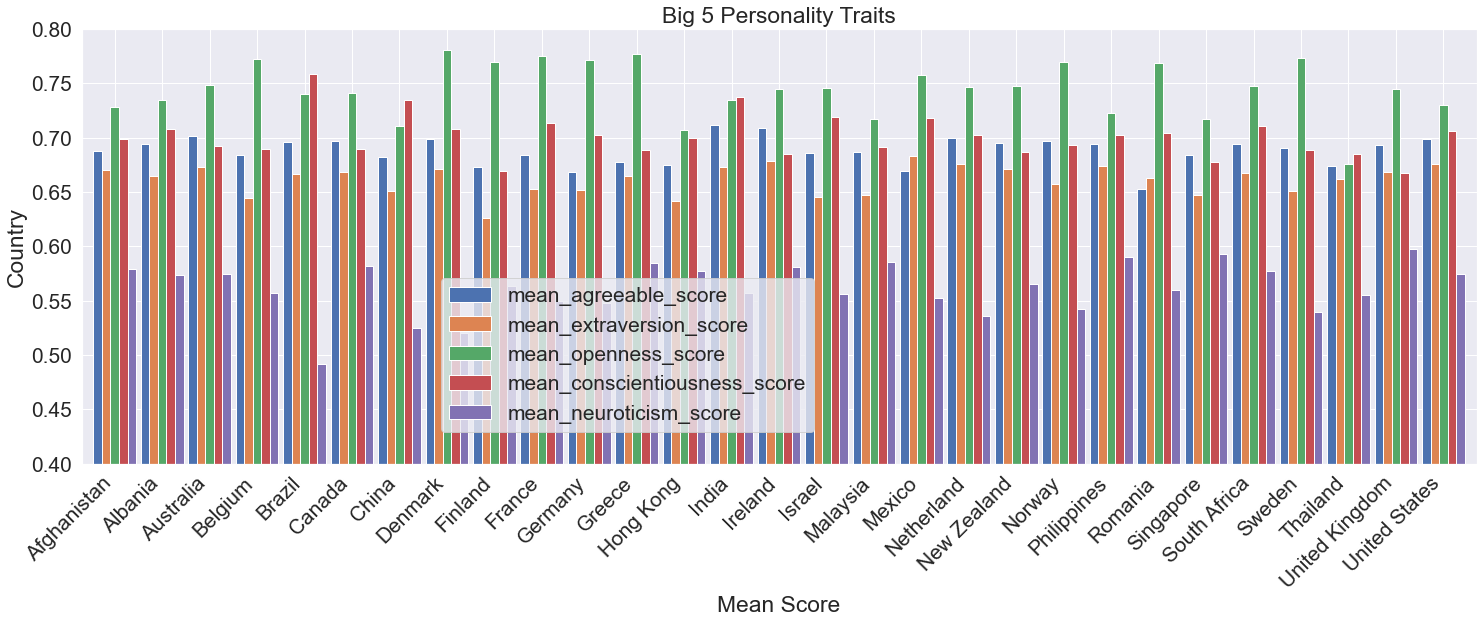

In [27]:
# plot mean score per contry for each category (from only those with over 500 entries)
# https://stackoverflow.com/questions/23556153/how-to-put-legend-outside-the-plot-with-pandas
country_df.plot(x="mean_country_name", y=["mean_agreeable_score", "mean_extraversion_score", "mean_openness_score", "mean_conscientiousness_score", "mean_neuroticism_score"], kind="bar", figsize=(25,8), ylim=(.4,.8), width=.9)
plt.title('Big 5 Personality Traits')
plt.legend(loc='center left', bbox_to_anchor=(0.25, 0.25))
plt.xlabel("Mean Score")
plt.ylabel("Country")
plt.xticks(rotation=45, ha='right')
plt.show()
plt.clf()
plt.cla()
plt.close()

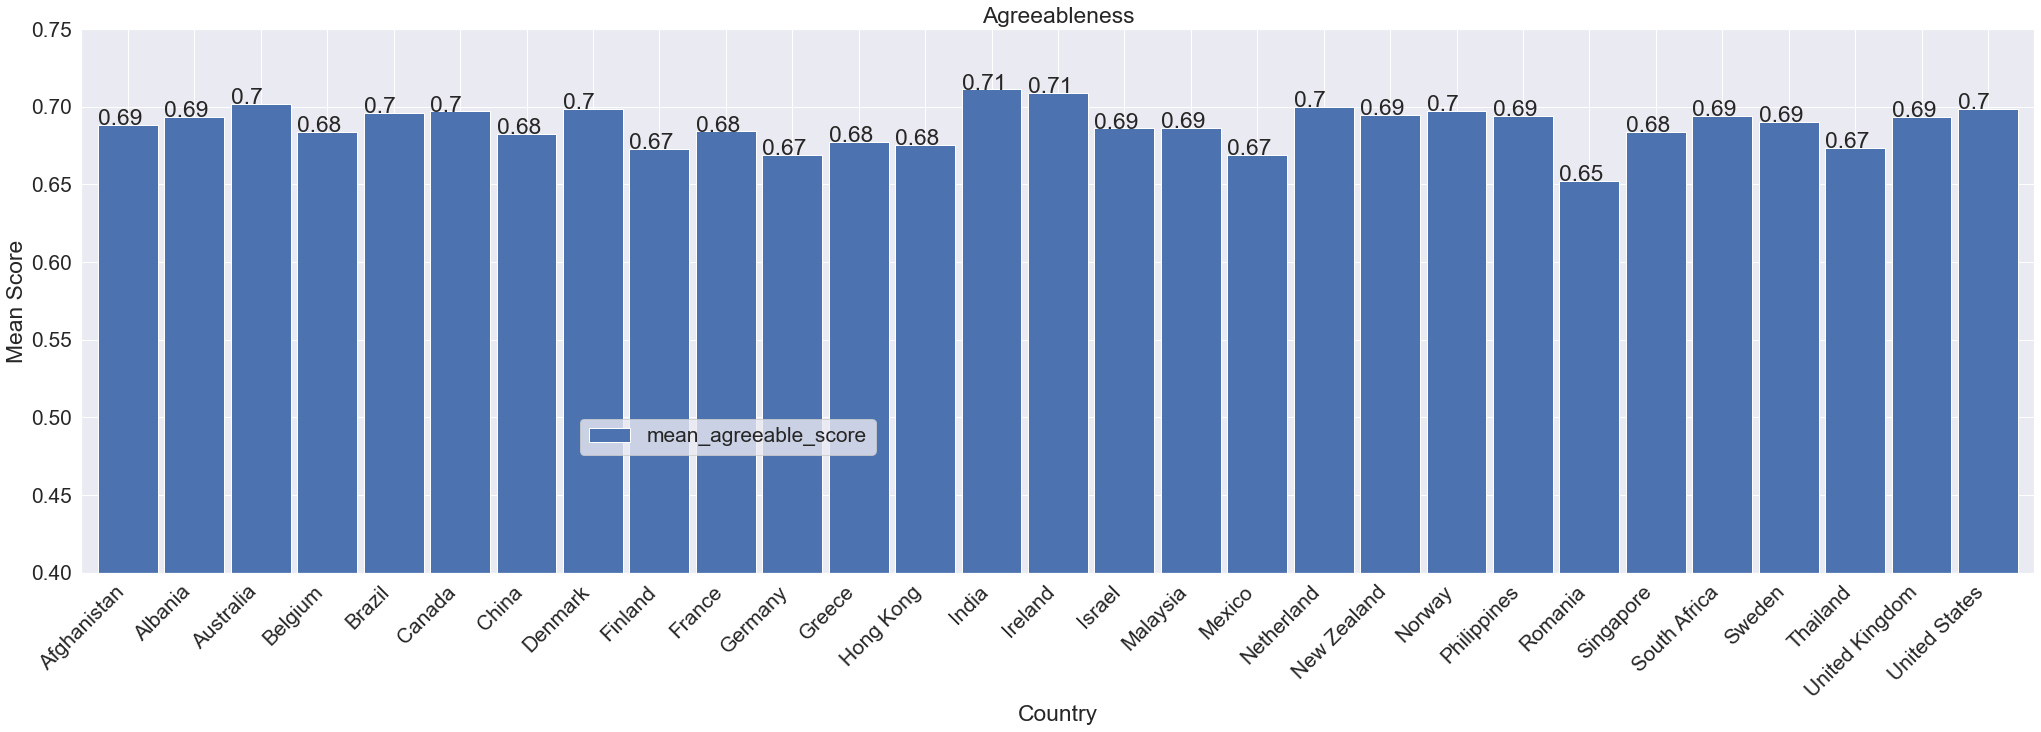

In [28]:
# individually plot mean agreeable score per country 
# https://stackoverflow.com/questions/25447700/annotate-bars-with-values-on-pandas-bar-plots
# https://stackoverflow.com/questions/17787366/setting-yaxis-in-matplotlib-using-pandas
ax = country_df.plot(x="mean_country_name", y="mean_agreeable_score", kind="bar", figsize=(35,10), width=.9, ylim=(.4,.75))
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.00, p.get_height() * 1.00))
plt.title('Agreeableness')
plt.legend(loc='center left', bbox_to_anchor=(0.25, 0.25))
plt.xlabel("Country")
plt.ylabel("Mean Score")
plt.xticks(rotation=45, ha='right')
plt.show()
plt.clf()
plt.cla()
plt.close()

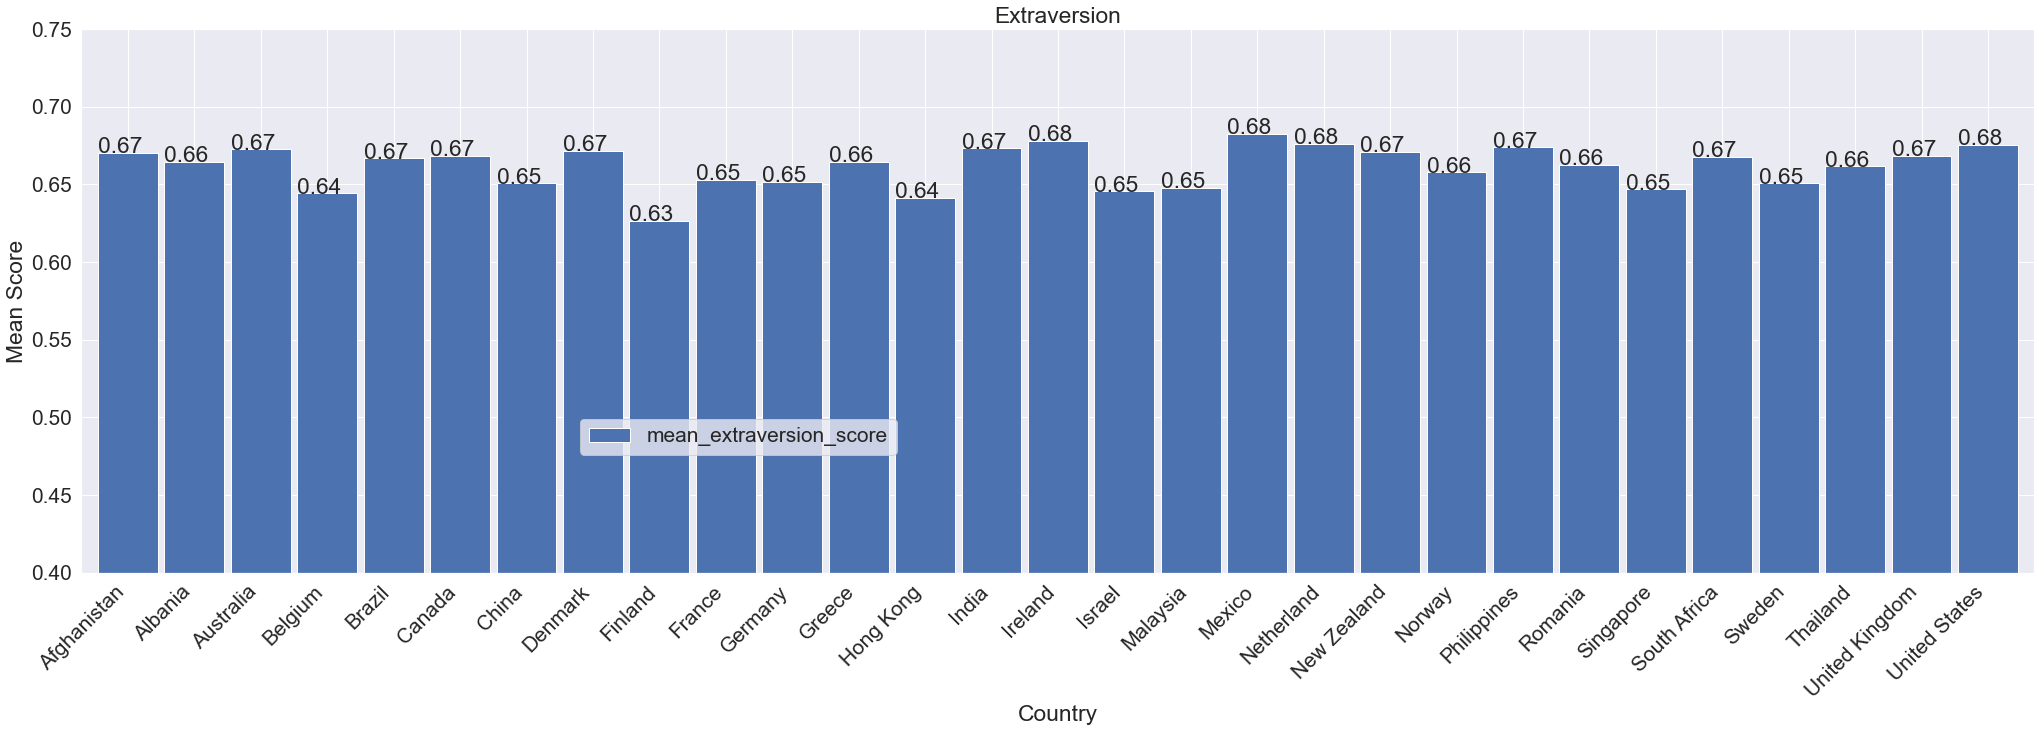

In [29]:
# individually plot mean extraversion score per country 
ax = country_df.plot(x="mean_country_name", y="mean_extraversion_score", kind="bar", figsize=(35,10), width=.9, ylim=(.4,.75))
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.00, p.get_height() * 1.00))
plt.title('Extraversion')
plt.legend(loc='center left', bbox_to_anchor=(0.25, 0.25))
plt.xlabel("Country")
plt.ylabel("Mean Score")
plt.xticks(rotation=45, ha='right')
plt.show()
plt.clf()
plt.cla()
plt.close()

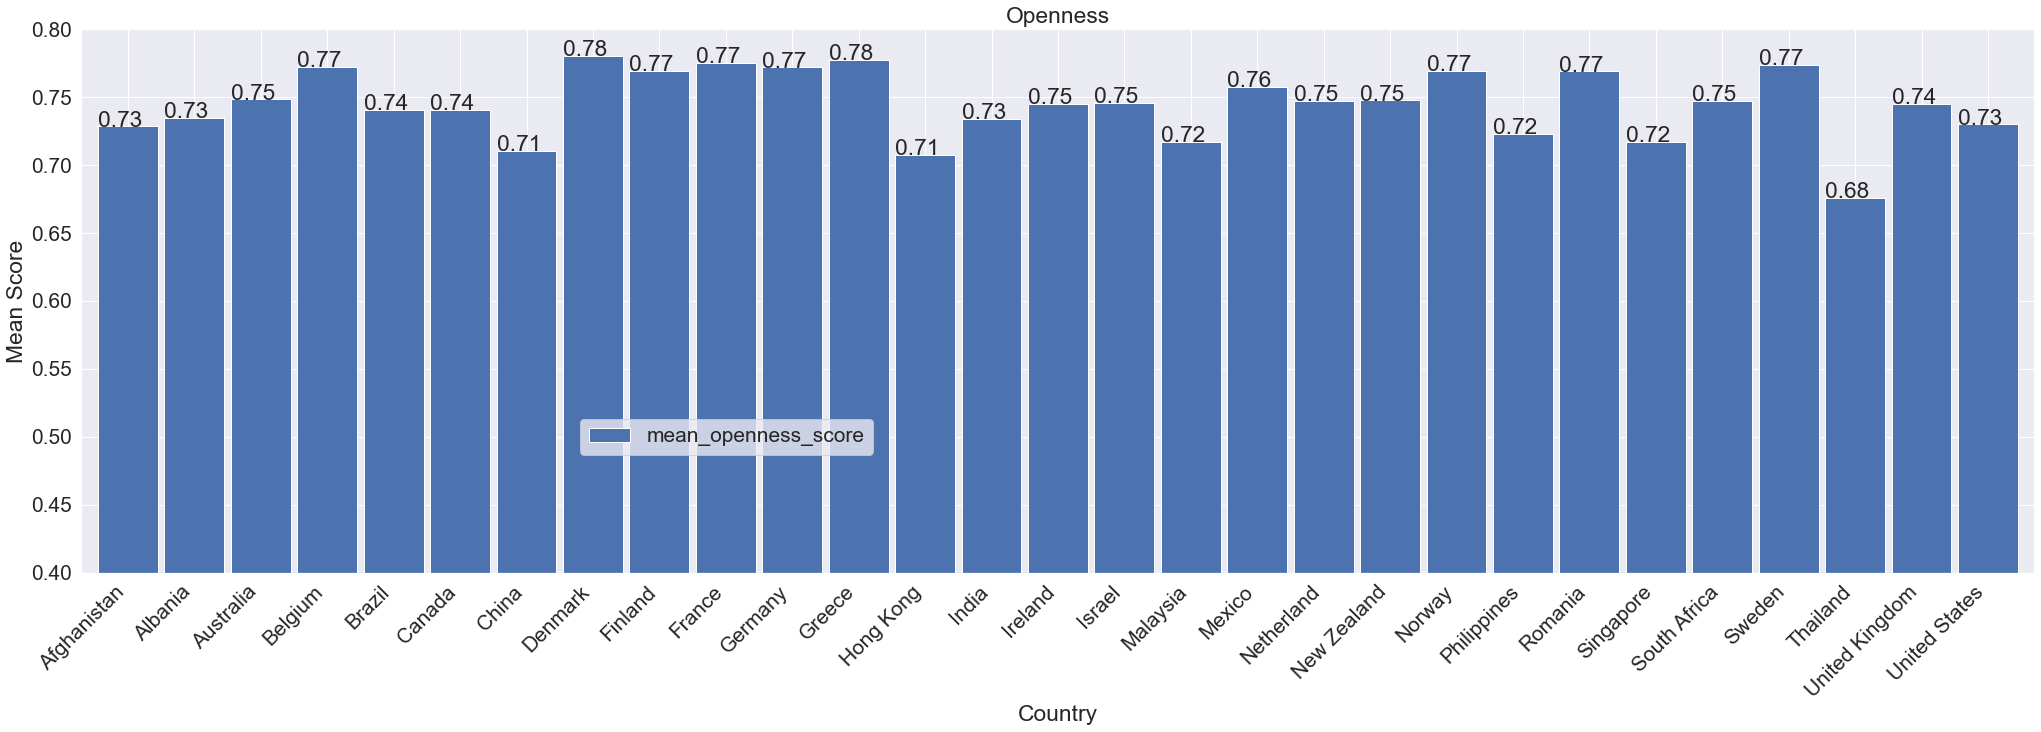

In [30]:
# individually plot mean openness score per country 
ax = country_df.plot(x="mean_country_name", y="mean_openness_score", kind="bar", figsize=(35,10), width=.9, ylim=(.4,.8))
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.00, p.get_height() * 1.00))
plt.title('Openness')
plt.legend(loc='center left', bbox_to_anchor=(0.25, 0.25))
plt.xlabel("Country")
plt.ylabel("Mean Score")
plt.xticks(rotation=45, ha='right')
plt.show()
plt.clf()
plt.cla()
plt.close()

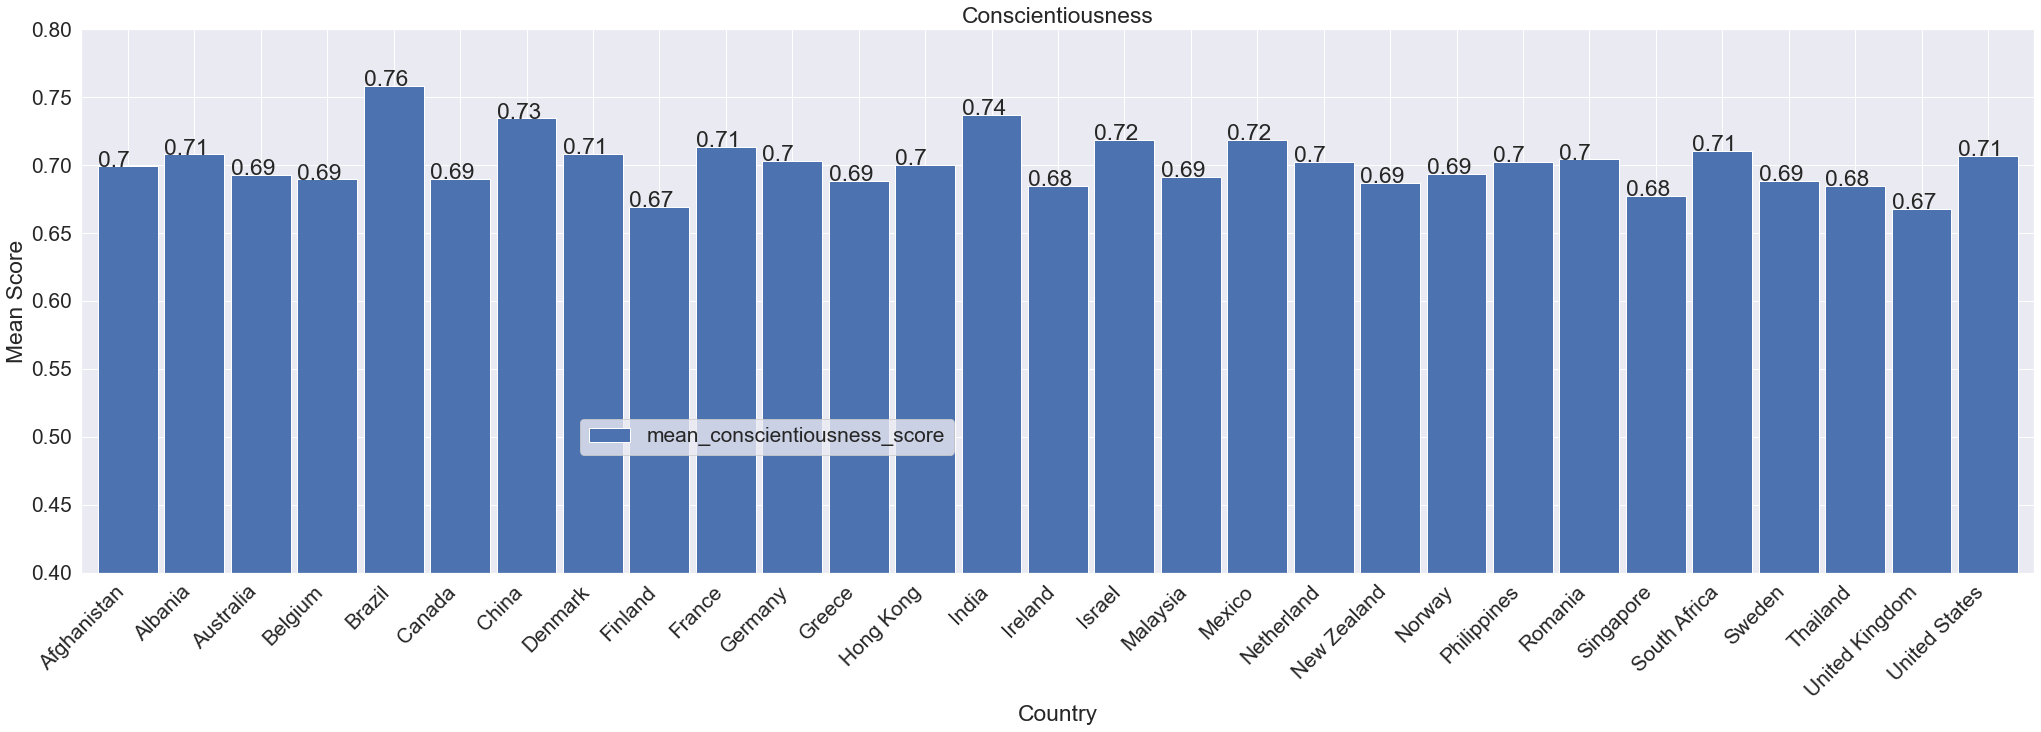

In [31]:
# individually plot mean conscientiousness score per country 
ax = country_df.plot(x="mean_country_name", y="mean_conscientiousness_score", kind="bar", figsize=(35,10), width=.9, ylim=(.4,.8))
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.00, p.get_height() * 1.00))
plt.title('Conscientiousness')
plt.legend(loc='center left', bbox_to_anchor=(0.25, 0.25))
plt.xlabel("Country")
plt.ylabel("Mean Score")
plt.xticks(rotation=45, ha='right')
plt.show()
plt.clf()
plt.cla()
plt.close()

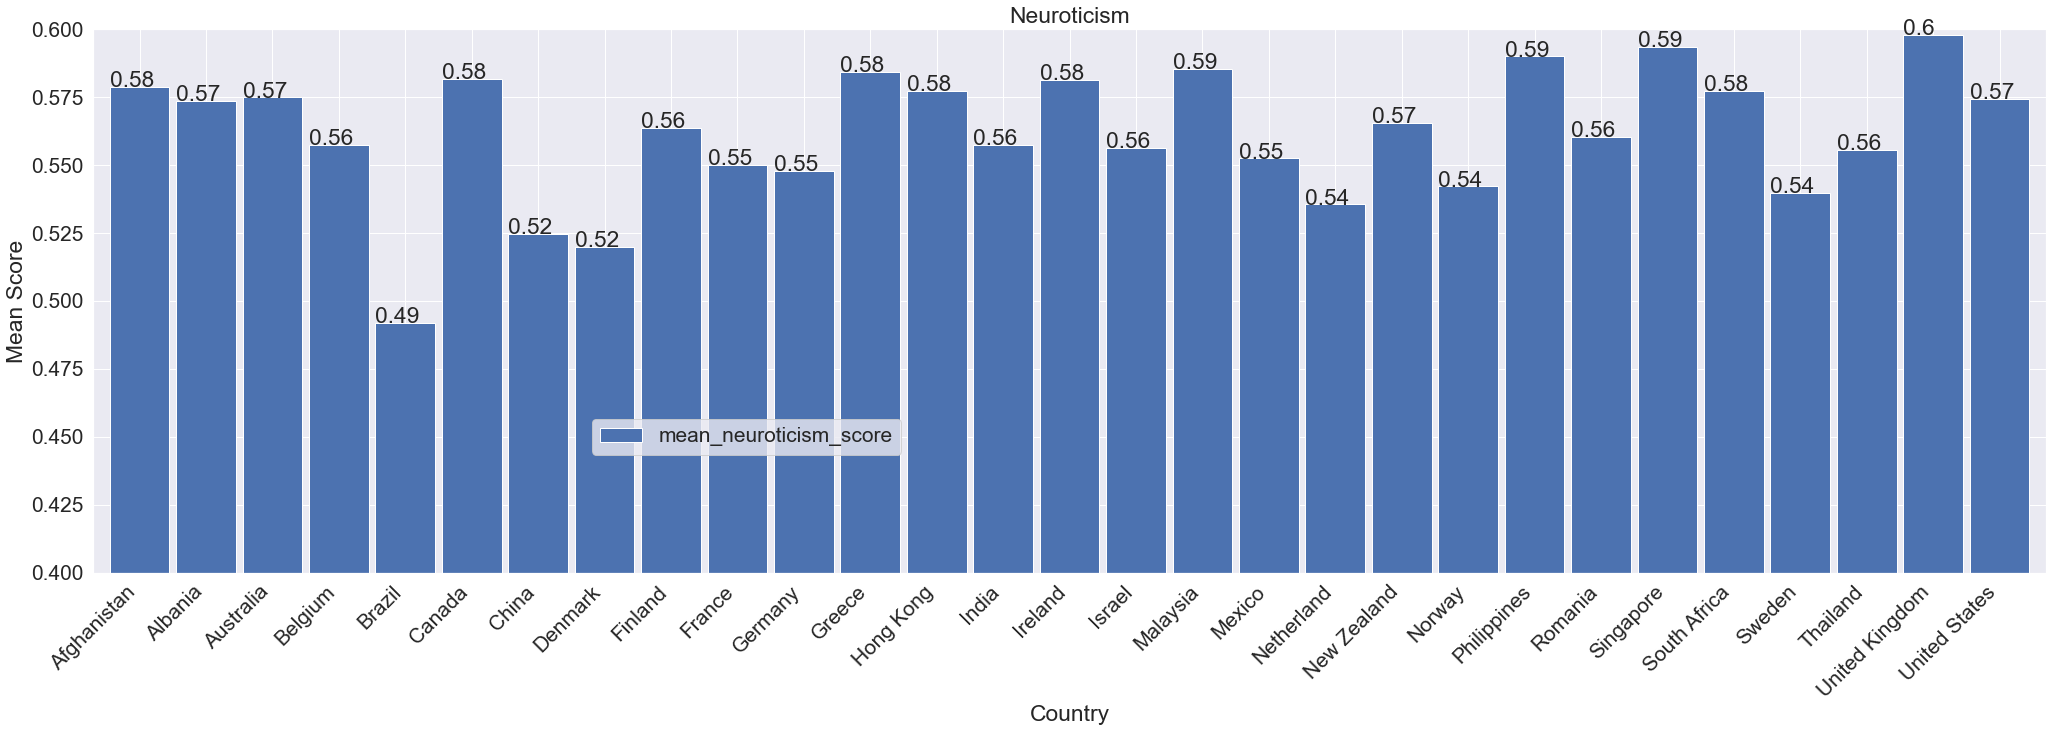

In [32]:
# individually plot mean neuroticism score per country 
ax = country_df.plot(x="mean_country_name", y="mean_neuroticism_score", kind="bar", figsize=(35,10), width=.9, ylim=(.4,.60))
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.00, p.get_height() * 1.00))
plt.title('Neuroticism')
plt.legend(loc='center left', bbox_to_anchor=(0.25, 0.25))
plt.xlabel("Country")
plt.ylabel("Mean Score")
plt.xticks(rotation=45, ha='right')
plt.show()
plt.clf()
plt.cla()
plt.close()

### Conclusions:
- openness is by far the highest score for most countries
    - this is most likely not due to similarities, but that people taking personality tests generally believe they are more open 
- India and Ireland are the most Agreeable
- Ireland, Mexico, and the United States are the most extraverted 
- Denmark and Greece are the most open
- Brazil and India are the most conscientious
- The United Kingdom, Singapore, the Philippines, and Malaysia are the most neurotic
- Overall, neuroticism had the lowest mean score. This could possibly be attributed to unintended bias from users who don't want to paint themselves in a light that sounds negative

## Personality and Viewings by Country

In [33]:
# create list of unique country names for personality
country_list = personality_df['country_name'].unique().tolist()

In [34]:
# create list of unique country names for netflix data
netflix_country_list = netflix_df['country_name'].unique().tolist()

In [35]:
# drops all rows with countries that aren't in the personality data
# https://www.interviewqs.com/ddi-code-snippets/rows-cols-python
netflix_filtered_df = netflix_df[netflix_df['country_name'].isin(country_list)]

In [36]:
# drop all rows with countries that aren't in the netflix data
personality_filtered_df = personality_df[personality_df['country_name'].isin(netflix_country_list)]

In [37]:
netflix_filtered_df.value_counts('country_name')

country_name
Germany           52
United Kingdom    52
United States     52
Hungary           52
Spain             52
                  ..
Lebanon            6
Jordan             6
Bangladesh         6
Indonesia          6
Sri Lanka          6
Length: 62, dtype: int64

In [38]:
# verify count matches
# len(netflix_filtered_df['country_name'].unique())

In [39]:
# verify count matches
# len(personality_filtered_df['country_name'].unique())

In [40]:
# split filtered df into movies and tv shows
netflix_filtered_movies_df = netflix_filtered_df[netflix_filtered_df['show_type'] == 'Movie']

In [41]:
netflix_filtered_shows_df = netflix_filtered_df[netflix_filtered_df['show_type'] == 'TV Show']

In [42]:
# find mean score for the 62 filtered countries and add mean_prefix to each 
filtered_country_score = personality_filtered_df.groupby('country_name', as_index=False)[['agreeable_score', 'extraversion_score','openness_score', 'conscientiousness_score', 'neuroticism_score']].mean().add_prefix('mean_')

In [43]:
# rename mean_country_name to just country_name
filtered_country_score.rename({'mean_country_name': 'country_name'}, axis=1, inplace=True)

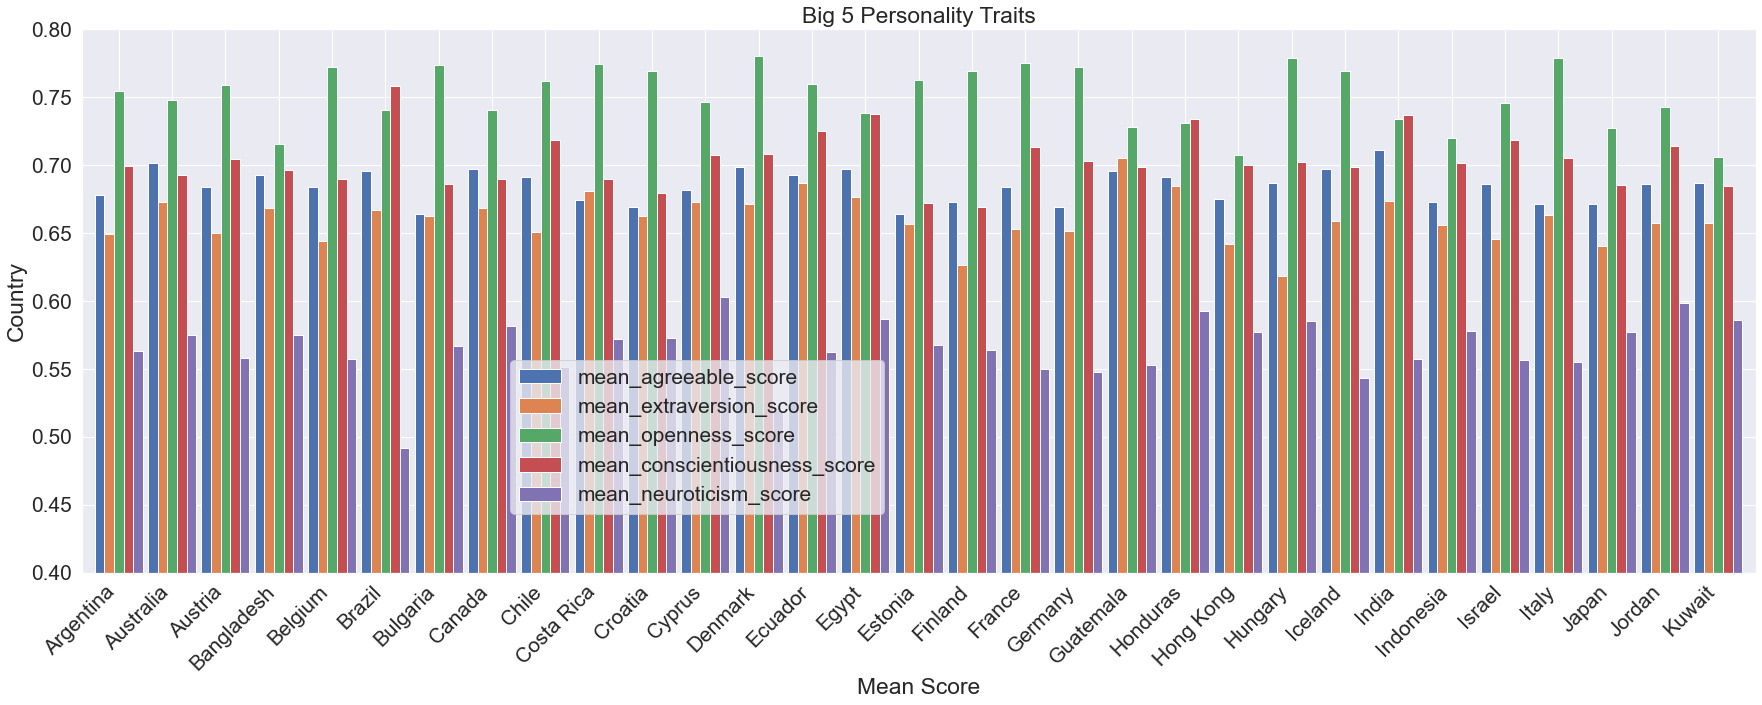

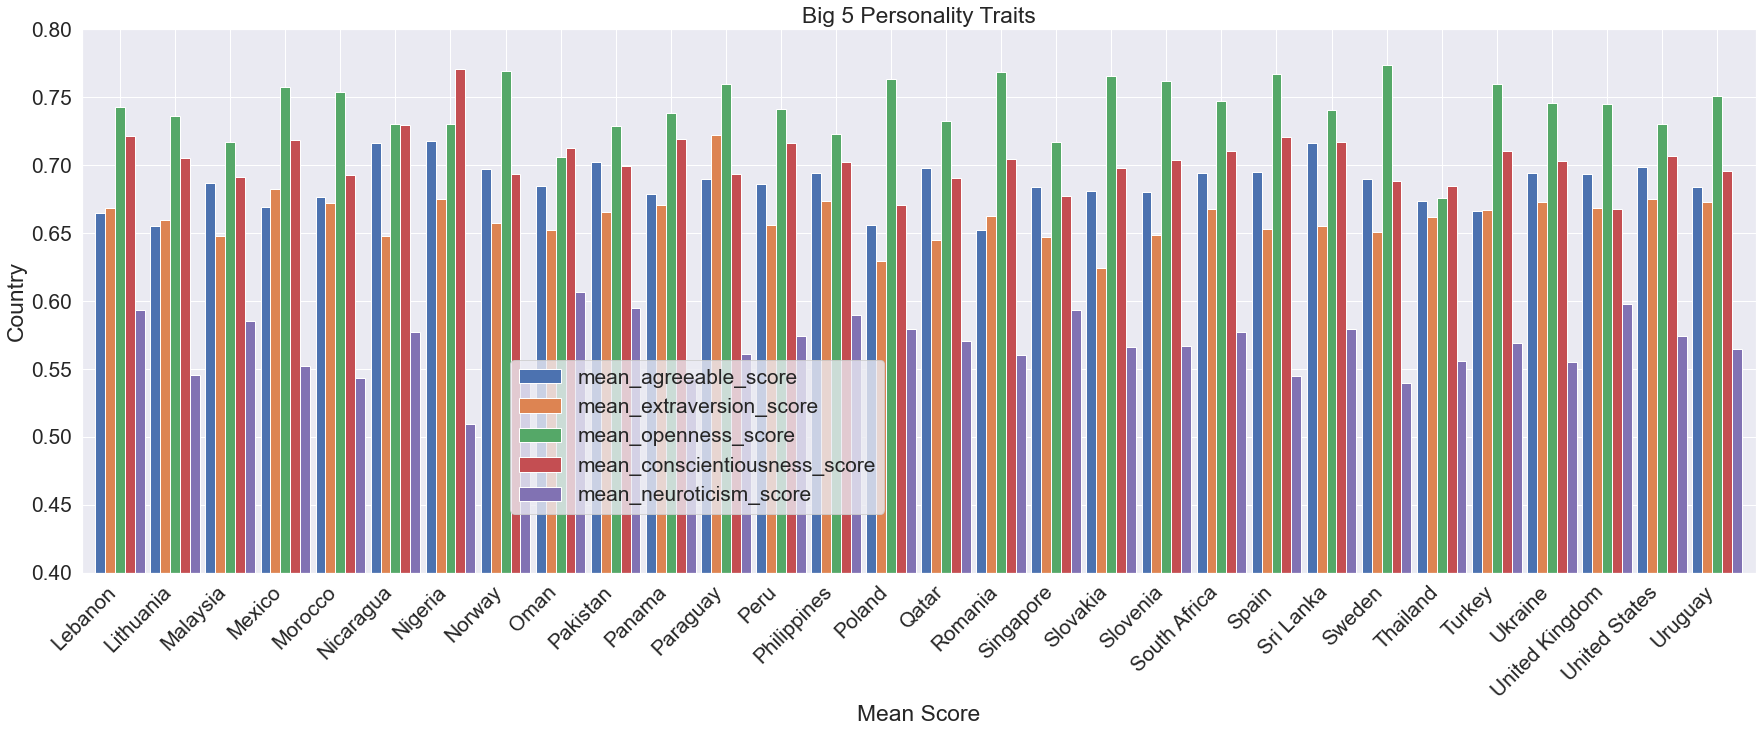

In [44]:
# plot 62 matching countries (too many, need to reduce)
# not super useful due to bar width (bigger monitor might benefit)
filtered_country_score.iloc[:31].plot(x="country_name", y=["mean_agreeable_score", "mean_extraversion_score", "mean_openness_score", "mean_conscientiousness_score", "mean_neuroticism_score"], kind="bar", figsize=(30,10), ylim=(.4,.8), width=.9)
plt.title('Big 5 Personality Traits')
plt.legend(loc='center left', bbox_to_anchor=(0.25, 0.25))
plt.xlabel("Mean Score")
plt.ylabel("Country")
plt.xticks(rotation=45, ha='right')
plt.show()

filtered_country_score.iloc[32:62].plot(x="country_name", y=["mean_agreeable_score", "mean_extraversion_score", "mean_openness_score", "mean_conscientiousness_score", "mean_neuroticism_score"], kind="bar", figsize=(30,10), ylim=(.4,.8), width=.9)
plt.title('Big 5 Personality Traits')
plt.legend(loc='center left', bbox_to_anchor=(0.25, 0.25))
plt.xlabel("Mean Score")
plt.ylabel("Country")
plt.xticks(rotation=45, ha='right')
plt.show()
plt.clf()
plt.cla()
plt.close()

In [45]:
# drop rows which have same country and title
# out of curiosity, not necessarily useful
# movies_no_duplicates = netflix_filtered_movies_df.drop_duplicates(
  # subset = ['country_name', 'title']).reset_index(drop = True)

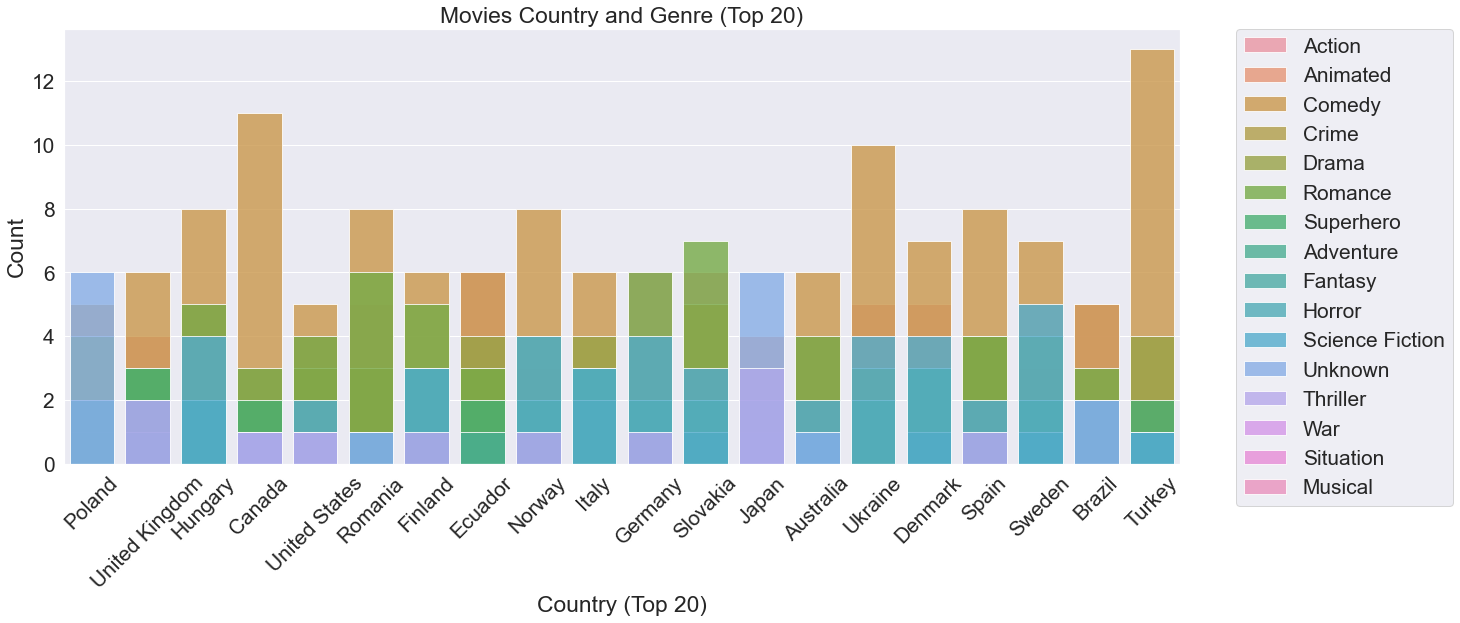

In [46]:
# plot top 20 count of movies per country. Stacked allows for wider bars and easier reading but obfuscates some of the data
plt.figure(figsize=(20,8))
sns.countplot(data=netflix_filtered_movies_df,x='country_name',hue='genre', alpha=0.8, order=netflix_filtered_movies_df.country_name.value_counts().iloc[:20].index, dodge=False)
plt.title('Movies Country and Genre (Top 20)')
plt.ylabel('Count')
plt.xlabel('Country (Top 20)')
plt.xticks(rotation=45, )
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()
plt.clf()
plt.cla()
plt.close()

In [47]:
# drop rows which have same country and title
# again, just curiosity
# https://www.geeksforgeeks.org/delete-duplicates-in-a-pandas-dataframe-based-on-two-columns/
# shows_no_duplicates = netflix_filtered_shows_df.drop_duplicates(
  # subset = ['country_name', 'title']).reset_index(drop = True)
# shows_no_duplicates

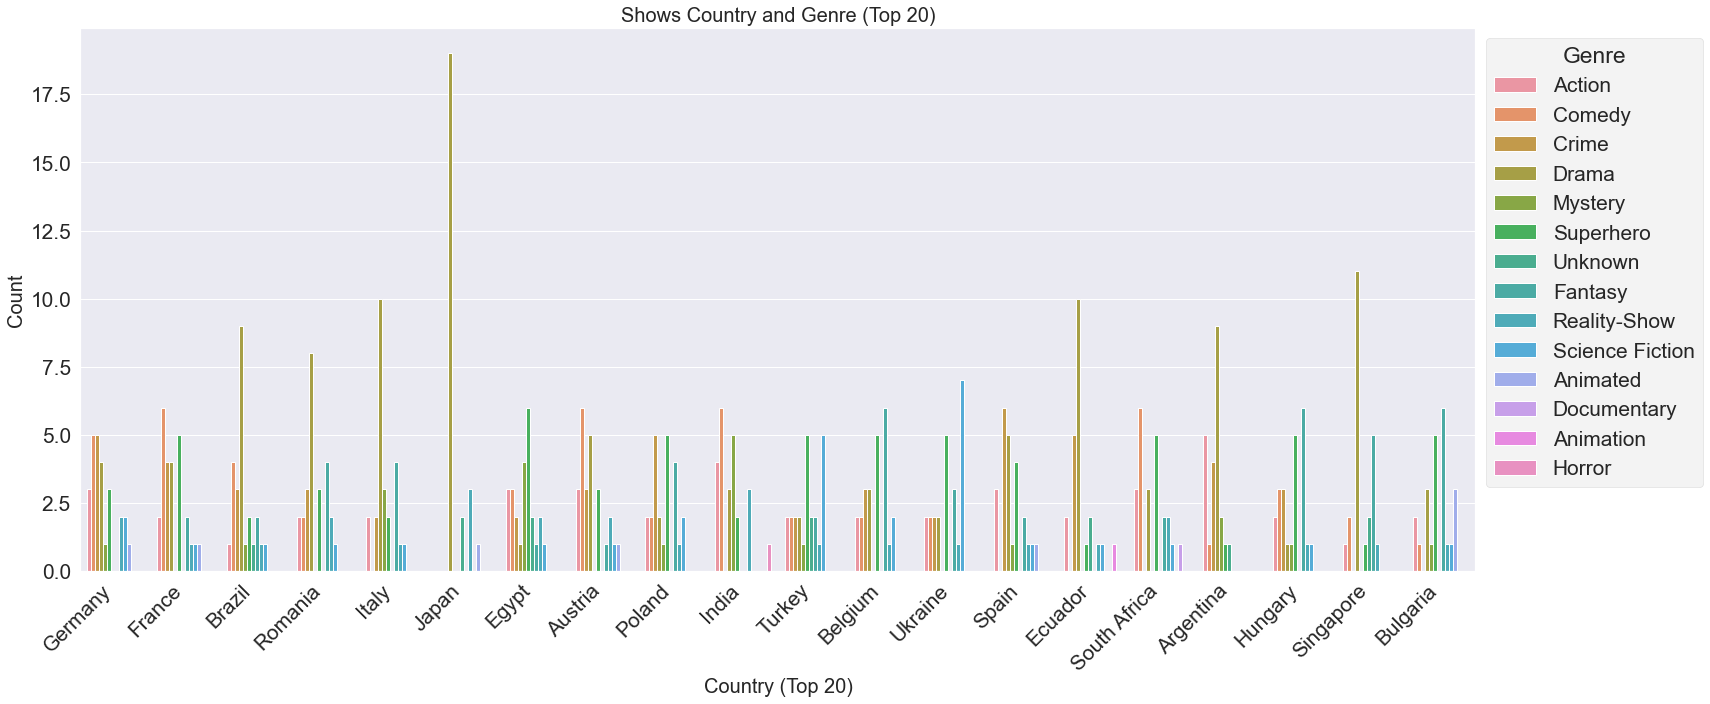

In [48]:
# plot top 20 tv show counts by country
# more accurate depiction than stacked but harder to read due to bar width
# played with color palattes but still can't differentiate between some colors at this size
plt.figure(figsize=(25,10))
sns.countplot(data=netflix_filtered_shows_df,x='country_name',hue='genre', alpha=1, order=netflix_filtered_shows_df.country_name.value_counts().iloc[:20].index)
plt.style.use('fivethirtyeight') 
plt.title('Shows Country and Genre (Top 20)', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.xlabel('Country (Top 20)', fontsize=20)
plt.legend(title='Genre', bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.5)
plt.xticks(rotation = 45, ha = 'right')
plt.show()
plt.clf()
plt.cla()
plt.close()

### Conclusions:
- 62 of the original 79 countries from the Netflix data are present in the personality data
- There were 235 countries in the original personality data. Filtered to match Netflix data
- generally similar personality results - just slightly different country set

### Need to choose a smaller sample size of countries for sake of time and scope. 
- These 5 countries because they had the most personality data
    - United States     212625
    - Canada             21798
    - United Kingdom     16489
    - Australia          10400
    - Netherland          3469
- But they are all kind of similar from a cultural standpoint 
- For diversity - add:
    - India
    - Singapore
- Remove Netherlands and Australia
- Add
    - Hungary
    - Germany
    - South Africa
    - Spain

### Sample 8 Analysis

In [49]:
# create list of 8 selected countries
# create 3 dfs for personality, movies, and tv shows with only those 8
sample_eight = ['United States', 'India', 'Singapore', 'United Kingdom', 'Canada', 'Hungary,', 'Germany', 'South Africa', 'Spain']
eight_country_personality = filtered_country_score.loc[filtered_country_score['country_name'].isin(sample_eight)]
eight_country_movies = netflix_filtered_movies_df.loc[netflix_filtered_movies_df['country_name'].isin(sample_eight)]
eight_country_shows = netflix_filtered_shows_df.loc[netflix_filtered_shows_df['country_name'].isin(sample_eight)]

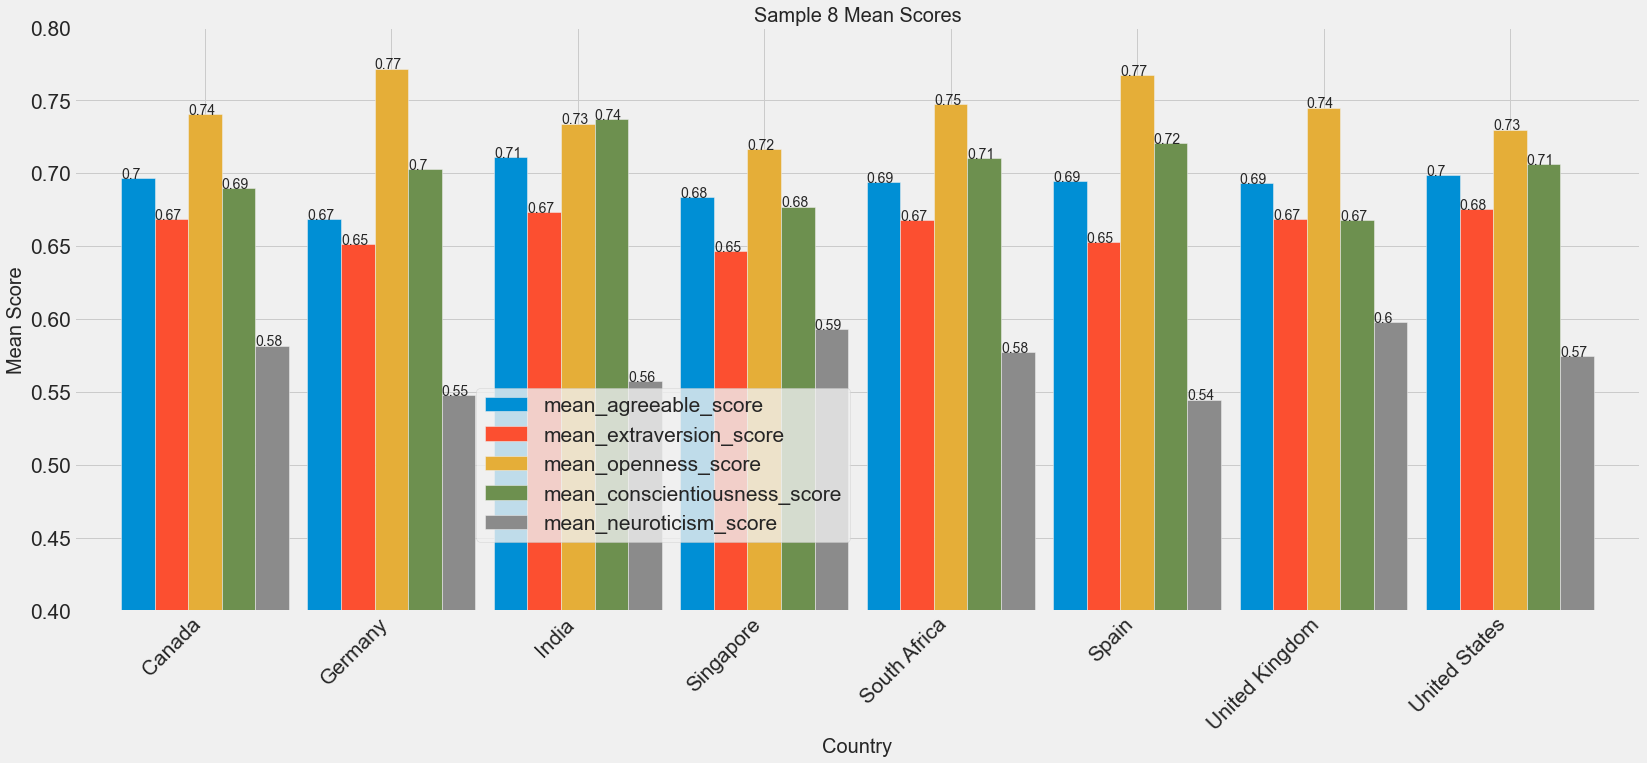

In [50]:
# plot mean data for each of the 8 countries 
ax = eight_country_personality.plot(x="country_name", y=["mean_agreeable_score", "mean_extraversion_score", "mean_openness_score", "mean_conscientiousness_score", "mean_neuroticism_score"], kind="bar", figsize=(25,10), ylim=(.4,.8), width=.9)
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1, p.get_height() * 1.00))
plt.title('Sample 8 Mean Scores', fontsize=20)
plt.legend(loc='center left', bbox_to_anchor=(0.25, 0.25))
plt.xlabel("Country", fontsize=20)
plt.ylabel("Mean Score", fontsize=20)
plt.xticks(rotation=45, ha='right')
plt.show()
plt.clf()
plt.cla()
plt.close()


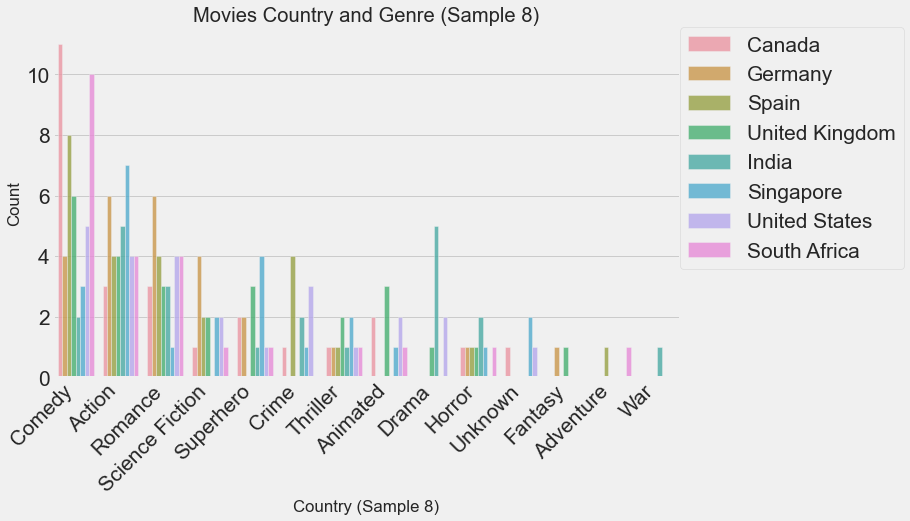

In [51]:
# plot 8 selected countries and movie genre counts 
plt.figure(figsize=(10,6))
sns.countplot(data=eight_country_movies,x='genre',hue='country_name', alpha=0.8, order=eight_country_movies.genre.value_counts().index)
plt.title('Movies Country and Genre (Sample 8)')
plt.ylabel('Count')
plt.xlabel('Country (Sample 8)')
plt.xticks(rotation=45, ha='right')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.show()
plt.clf()
plt.cla()
plt.close()

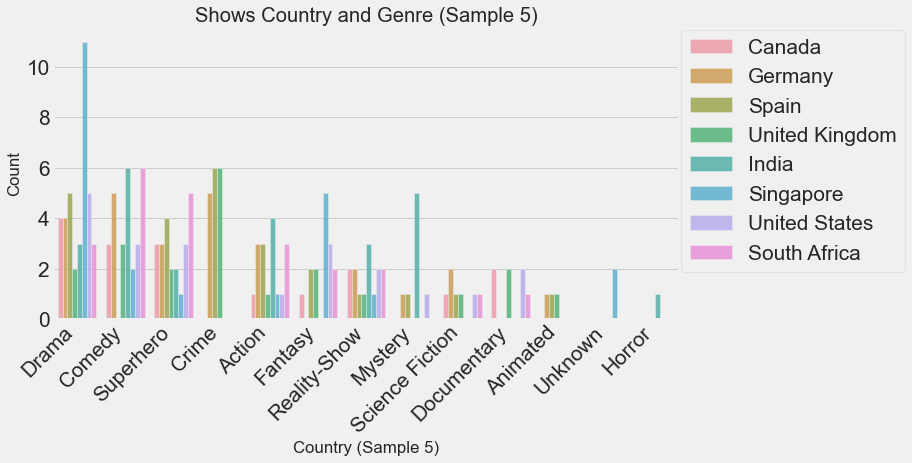

In [52]:
# plot 8 selected countries and tv show genre counts
plt.figure(figsize=(10,5))
sns.countplot(data=eight_country_shows,x='genre',hue='country_name', alpha=0.8, order=eight_country_shows.genre.value_counts().index)
plt.title('Shows Country and Genre (Sample 5)')
plt.ylabel('Count')
plt.xlabel('Country (Sample 5)')
plt.xticks(rotation=45, ha='right')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.1)
plt.show()
plt.clf()
plt.cla()
plt.close()

### Conclusions:
- Big 5 score orders
    - Canada 
        - 1) open
        - 2) agreeable
        - 3) conscientious
        - 4) Extraversion
        - 5) neurotic
    - India
        - 1) conscientious 
        - 2) open
        - 3) agreeable
        - 4) Extraversion
        - 5) neurotic
    - Singapore
        - 1) open
        - 2) agreeable
        - 3) conscientious
        - 4) extraversion
        - 5) neurotic
    - United Kingdom
        - 1) open
        - 2) agreeable
        - 3) extraversion
        - 4) conscientious
        - 5) neurotic
    - United States
        - 1) open
        - 2) conscientious
        - 3) agreeable
        - 4) extraversion
        - 5) neurotic
    - Germany
        - 1) open
        - 2) conscientious
        - 3) agreeable
        - 4) extraversion
        - 5) neurotic
    - Spain
        - 1) open
        - 2) conscientious
        - 3) agreeable
        - 4) extraversion
        - 5) neurotic
    - South Africa
        - 1) open
        - 2) conscientious
        - 3) agreeable
        - 4) extraversion
        - 5) neurotic
- TV Shows
    - Only the UK and Spain have crime shows in their #1 slot at all 
    - United States mostly watches dramas, closely followed by comedy, superhero and fantasy 
    - Canada primarily drama and superhero
    - Singapore primarily drama and fantasy
    - India mostly watches comedy and mystery
    - Germany watches comedy
    - South Africa watches comedy and superhero
    - Spain watches crime and drama
- Movies
    - Canada watches comedies
    - UK mostly watches comedies
    - India watches drama
    - Singapore watches action
    - United States' tops are comedy, then actiona and romance
    - Germany watches action and romance
    - South Africa watches comedy
    - Spain watches comedy

### Personality Data (Not Mean)

In [53]:
# create new dfs with individualized personality data instead of just averaged
sample_personality = personality_df.loc[personality_df['country_name'].isin(sample_eight)]
sample_movies = netflix_movies_df.loc[netflix_movies_df['country_name'].isin(sample_eight)]
sample_shows = netflix_shows_df.loc[netflix_shows_df['country_name'].isin(sample_eight)]

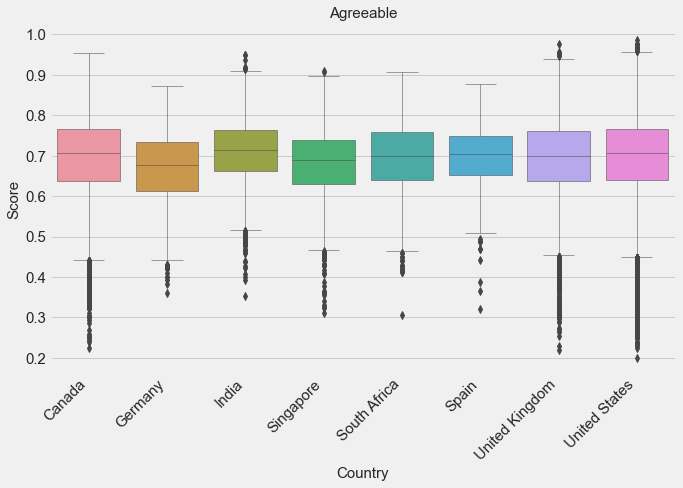

In [54]:
# box and whisker agreeable score distribution in 8 selected countries
plt.figure(figsize=(10,6))
sns.boxplot(x="country_name", y="agreeable_score", data=sample_personality, linewidth = 0.5)

# add axis texts
plt.xlabel('Country', fontsize=15)
plt.ylabel('Score', fontsize=15)
plt.title('Agreeable', fontsize=15)

plt.xticks(rotation = 45, ha = 'right')
plt.tick_params(labelsize=15)

plt.show()
plt.clf()
plt.cla()
plt.close()

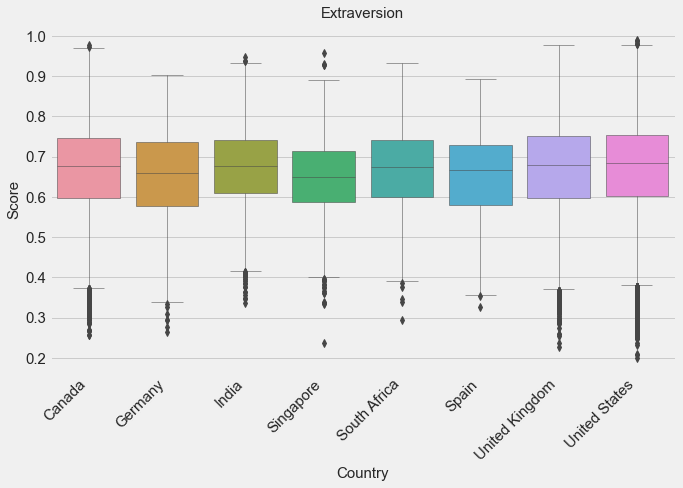

In [55]:
# box and whisker agreeable score distribution in 8 selected countries
plt.figure(figsize=(10,6))
sns.boxplot(x="country_name", y="extraversion_score", data=sample_personality, linewidth = 0.5)

# add axis texts
plt.xlabel('Country', fontsize=15)
plt.ylabel('Score', fontsize=15)
plt.title('Extraversion', fontsize=15)

plt.xticks(rotation = 45, ha = 'right')
plt.tick_params(labelsize=15)

plt.show()
plt.clf()
plt.cla()
plt.close()

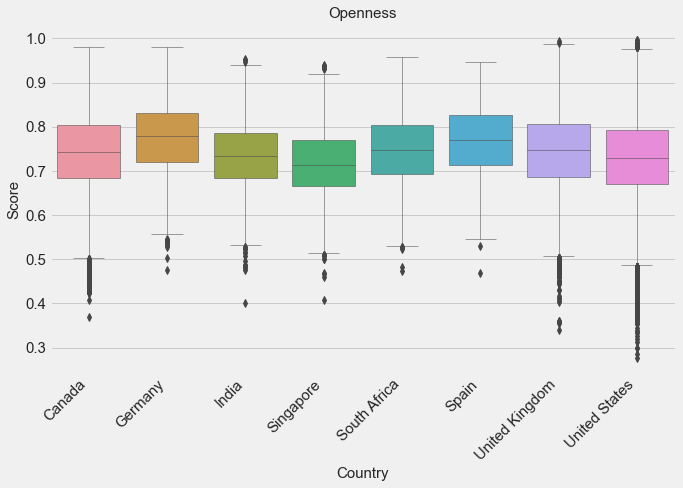

In [56]:
# box and whisker agreeable score distribution in 8 selected countries
plt.figure(figsize=(10,6))
sns.boxplot(x="country_name", y="openness_score", data=sample_personality, linewidth = 0.5)

# add axis texts
plt.xlabel('Country', fontsize=15)
plt.ylabel('Score', fontsize=15)
plt.title('Openness', fontsize=15)

plt.xticks(rotation = 45, ha = 'right')
plt.tick_params(labelsize=15)

plt.show()
plt.clf()
plt.cla()
plt.close()

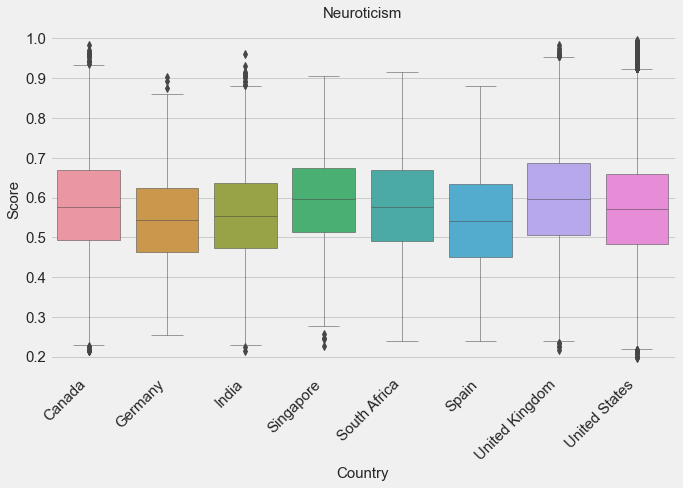

In [57]:
# box and whisker agreeable score distribution in 8 selected countries
plt.figure(figsize=(10,6))
sns.boxplot(x="country_name", y="neuroticism_score", data=sample_personality, linewidth = 0.5)

# add axis texts
plt.xlabel('Country', fontsize=15)
plt.ylabel('Score', fontsize=15)
plt.title('Neuroticism', fontsize=15)

plt.xticks(rotation = 45, ha = 'right')
plt.tick_params(labelsize=15)

plt.show()
plt.clf()
plt.cla()
plt.close()

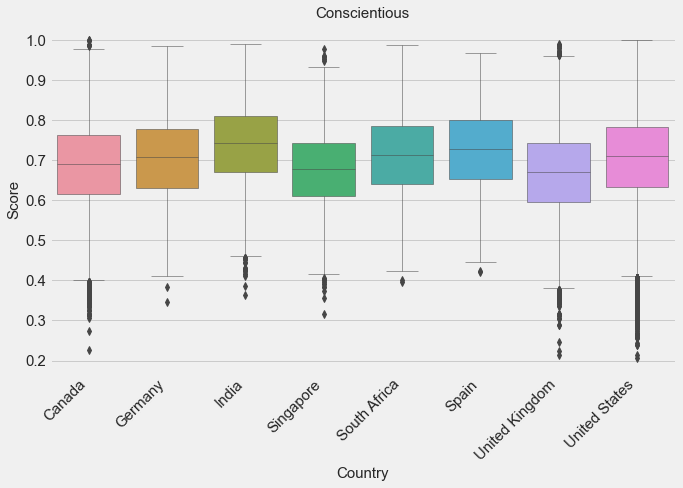

In [58]:
# box and whisker agreeable score distribution in 8 selected countries
plt.figure(figsize=(10,6))
sns.boxplot(x="country_name", y="conscientiousness_score", data=sample_personality, linewidth = 0.5)

# add axis texts
plt.xlabel('Country', fontsize=15)
plt.ylabel('Score', fontsize=15)
plt.title('Conscientious', fontsize=15)

plt.xticks(rotation = 45, ha = 'right')
plt.tick_params(labelsize=15)

plt.show()
plt.clf()
plt.cla()
plt.close()

### Ratings Analysis

In [59]:
# find mean rating for the 8 sample countries and add mean_prefix to each 
eight_movie_ratings = eight_country_movies.groupby('country_name', as_index=False)[['imdb_rating','rt_rating']].mean().add_prefix('mean_')
eight_show_ratings = eight_country_shows.groupby('country_name', as_index=False)[['imdb_rating','rt_rating']].mean().add_prefix('mean_')

In [60]:
# rename mean_country_name to just country_name
eight_movie_ratings.rename({'mean_country_name': 'country_name'}, axis=1, inplace=True)
eight_show_ratings.rename({'mean_country_name': 'country_name'}, axis=1, inplace=True)

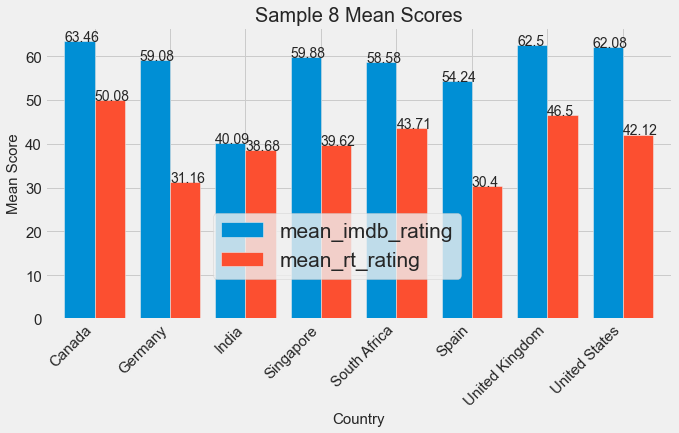

In [61]:
# plot mean data for each of the 8 countries (movies)
ax = eight_movie_ratings.plot(x="country_name", y=["mean_imdb_rating", "mean_rt_rating"], kind="bar", figsize=(10,5), width=.8,)
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1, p.get_height() * 1.00))
plt.title('Sample 8 Mean Scores', fontsize=20)
plt.legend(loc='center left', bbox_to_anchor=(0.25, 0.25))
plt.xlabel("Country", fontsize=15)
plt.ylabel("Mean Score", fontsize=15)
plt.xticks(rotation=45, ha='right')
plt.tick_params(labelsize=15)
plt.show()
plt.clf()
plt.cla()
plt.close()

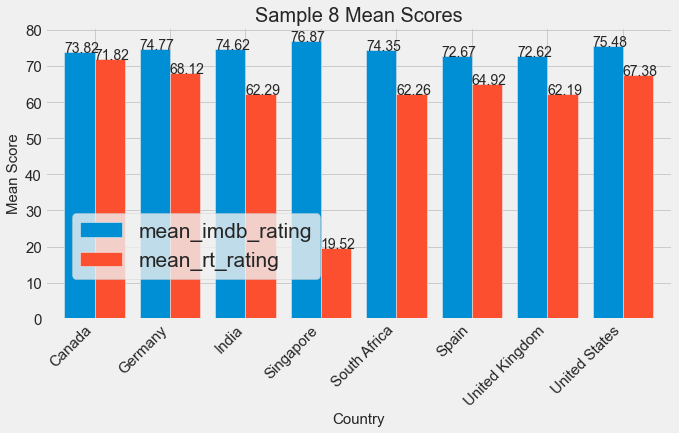

In [62]:
# plot mean data for each of the 8 countries (movies)
ax = eight_show_ratings.plot(x="country_name", y=["mean_imdb_rating", "mean_rt_rating"], kind="bar", figsize=(10,5), width=.8,)
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1, p.get_height() * 1.00))
plt.title('Sample 8 Mean Scores', fontsize=20)
plt.legend(loc='center left', bbox_to_anchor=(0.025, 0.25))
plt.xlabel("Country", fontsize=15)
plt.ylabel("Mean Score", fontsize=15)
plt.xticks(rotation=45, ha='right')
plt.tick_params(labelsize=15)
plt.show()
plt.clf()
plt.cla()
plt.close()

### Personality Analysis
#### Genre indicators
- Comedy
    - more open (more creative and adventurous) and slightly less conscientious (less attention to detail and disorganized). And females who showed a preference towards this genre (when both sexes did) were more open than males.
    - comedy movies are often more original, they contain humor, their plot lines are unpredictable, and they challenge conventional ways of thinking.
- Horror
    - less agreeable (less altruistic), less extroverted (more reserved), and more neurotic (more nervous and tense).
    - people who dislike horror films are more agreeable and prefer a move that displays images of kindness and warmth (not brutality)
- Action
    - more conscientious (hard working), less neurotic (less emotionally stable), and more open (creative and adventurous). And females who showed a preference towards this genre (when both sexes did) were more open than males, as with the comedy genre.
    - such individuals often have a preference for familiarity. This is compatible with the predictable and familiar plot that is often associated with action movies.
    - people who are more neurotic will gravitate towards movies that are lighter (such as comedy) that free them from their neuroticism.
- Romance
    - More conscientious (hard working) and more neurotic (more emotionally unstable) people seem to favor romance movies. And males who showed a preference towards this genre (when both sexes did) were more open than females
    - Romantic movies have predictable plots and similar characters; hence compatibility with conscientious viewers.
    - They also provide happy endings, which provides comfort to the neurotic who may seek to break free from the tension and anxiety in his own life.
- Fantasy
    - greater openness (creative and adventurous) and lower levels of extroversion (more reserved).
    - The plots are often also very creative and appeal to the intellectual.
    - imagination it seems is something introverts develop more than extroverts.
- Drama
    - greater openness (more creative and adventurous), counscientiousness (attention to detail), and extraversion (outgoing)
    - These tend to be more exciting but with conflict that an introvert or more neurotic person might avoid
- Crime
    - naturally made to be thrilling - experience the events without the trauma. Could provide some form of emotional release.
    - Most have a satisfying conclusion where the mystery is solved or the victims are given the justice they deserve. The viewer can feel relaxed after generally sleeps better
    - enables you to venture into the world of evil from a safe distance. 
    - It’s more about feeding people’s imaginations and having their questions answered when it comes to the events leading up to a crime, and after it.
    - More conscientious (hardworking) people and more neurotic (anxious) people might like these. The provide satisfying endings and provide an escape from real life 
- Superhero 
    - personality characterization here depends on the superhero, and level of interest. Hardcore fans tend to be more neurotic (and narcisistic), but everyday fans are open to new experiences and imaginative 

#### Country characterization
- US is more individualistic which explains why there are more outliars in every category as demonstrated with the boxplot. 
    - their top 3 movie categories are comedy, action, and romance
    - as described above, those who like comedy tend to be more open and slightly less conscientious
    - the US top traits are openness and conscientiousness - this data is in line
    - top shows are drama, then then a tie between comedy, superhero, and fantasy
- Canada tends to be a little bit collectivist and individualist
    - top traits are open and agreeable
    - they primarily watch comedy which is predictable, though agreeable was their second trait and tends to be lower in those who like comedies
    - top shows are drama and superhero
- Singapore and India are collectivists
    - Singapore traits are open and agreeable
        - their top movies are action which indicates a more open, less neurotic personality
        - top shows are drama and fantasy which indicates greater openness and lower extraversion
    - India traits are conscientious and open
        - their top movies are drama which is characterized by openness and conscientiousness
        - top shows are comedy and mystery - this is demonstrated with openness and extraversion
- Germany - well organized, strong individualism due to historical events
    - top traits are open and conscientious
    - top movies are action and romance. Action movies indicate higher conscientiousness and openness. Romance movies indicate higher conscientiousness though higher neuroticism which is not explained in this data
    - top shows are comedy
- United Kingdom - pretend they're individualist but are typically collectivist leaning
    - top traits are open and agreeable
    - top movies are comedies - similar to canada, openness and comedies go hand in hand
    - top shows are crime - indicates conscientious and neurotic tendencies 
- South Africa more open, less collectivist
    - top traits are open and conscientious
    - top movies are comedies - similar to canada and the UK
    - top shows are comedy and superhero - indicates agreeable and openness respectively 
- Spain
    - top traits are open and conscientious
    - top movies are comedy - similar to Canada, the UK, and South Africa
    - top shows are crime and drama - indicates conscientious and neurotic tendencies as well as openness

### Hypotheses/Questions:
- There is a correlation between personality and movie/tv show choices
    - True. Though not 100%. This could be due to biases in self reported tests as well as cultural desire to participate in such tests. 
- personality can be grouped on a country wide scale, thus making country movie/tv show choices predictable. 
    - True. There are outliers, but a general idea could be presented given no extenuating current even circumstances
- movie choices will reflect cultural personalities
    - True to a degree. The countries I sampled seemed in line in regards to personality and movie choices. Howevever, as it is self reported personality data it is not entirely accurate. It does, however, give a generalized support of my hypothesis. 
- countries with higher scores in extraversion and agreeability will watch movies with lower ratings 
    - All 8 sample countries had an extraversion score of .65-.68
    - Canada, India, and the US had aggreeable scores over .7
    - IMDB Ratings
        - India lowest movie ratings by a lot
            - True - top 3 highest agreeable scores and within the range of all extraversion scores
        - UK lowest tv show ratings but not by much
            - Partially true - fall into the high extraversion category but not top 3 for agreeableness (.69)
    - Rotten Tomatoes Ratigns
        - Germany and Spain, then India and Singapore for movies
            - All are in the same range for extraversion
            - Only India has a top score for agreeable. Germany and Spain are both .65
        - Singapore by a wide margin
            - False - In the range for extraversion, only .65 for agreeable (5% off from top 3)
    - Partially true - indicates some lapse in data    
         